# **PROBLEM DEFINITION**
The objective of this project is to analyze the dataset's result of past bank telemarketing campaign and perform machine learning algorithms for predicting valuable customers who will join a term deposit product. The dataset was taken from 2008 to 2013 and it had an imbalance data with the majority of negative result distribution. As the bank's data scientists, we decided to focus on minimizing False Negative Class.

Evaluation metric that we will use is Recall. Where we will minimize false negative class - where we predicted clients that will not open a term deposit, turns out they actually want to open a term deposit. As our objective is to have as many clients to open a term deposit, therefore increasing recall will decrease this type of error.

# **BUSINESS CASE : to predict a successful term deposit so the Portugese bank can target the right client that will open a term deposit through a telemarketing**

In [3]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Domain Analysis**

# **Client Details**

age :The age of the candidate (numeric)

job : Type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : Marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")


# The last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

duration: last contact duration, in seconds (numeric). this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# **Other attributes**

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    
    
emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)    
    

# **Output variable (desired target)**:

y - has the client subscribed a term deposit? (binary: "yes","no")    
        

# **Basic Checks**

In [6]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
data.shape

(41188, 21)

In [8]:
## Getting all columns form the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
data.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 
#for numericals

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.describe(include= 'object')
#for categorical values

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# **Checking the dataset**

In [13]:
# target class count
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'target variable')

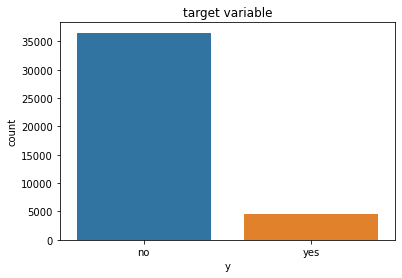

In [14]:
sns.countplot(data["y"])
plt.title("target variable")

In [15]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734583
yes    11.265417
Name: y, dtype: float64


The class distribution in the target variable is ~89:11 indicating an imbalance dataset

# **EDA**


In [16]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [17]:
#there are some duplicated values there is no need to call the same person multiple times so it wills ave time and money


In [18]:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

# univariate analysis of categorical variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


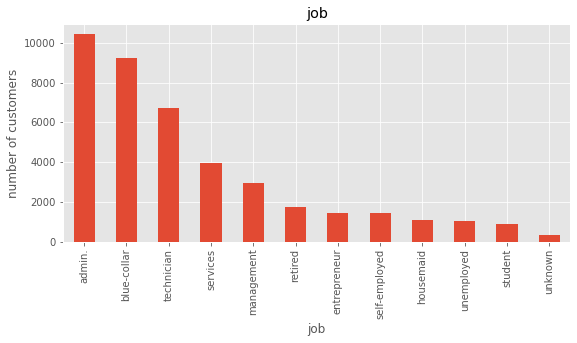

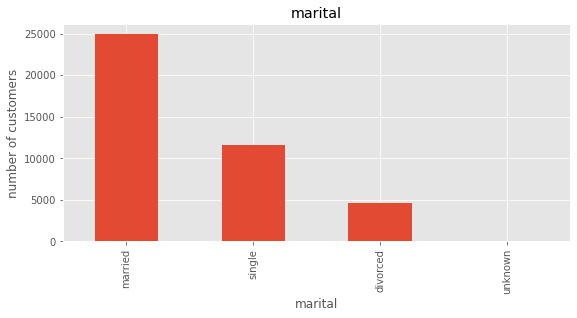

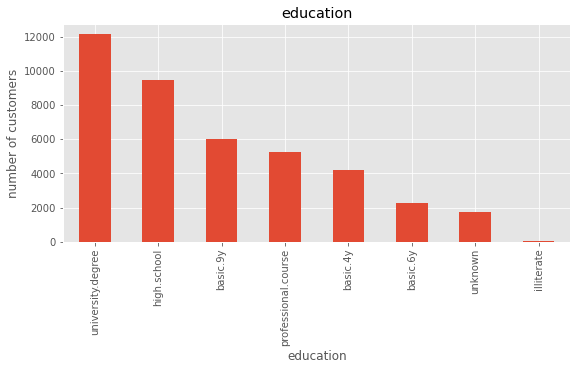

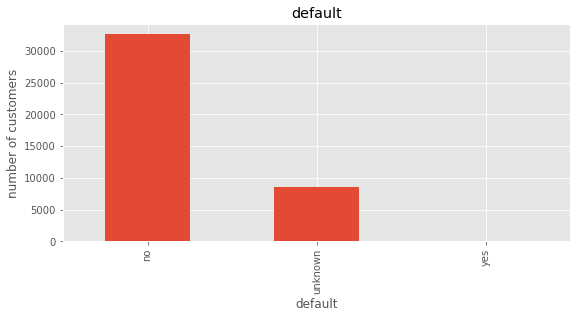

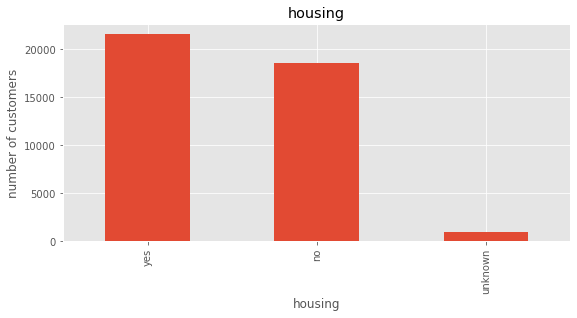

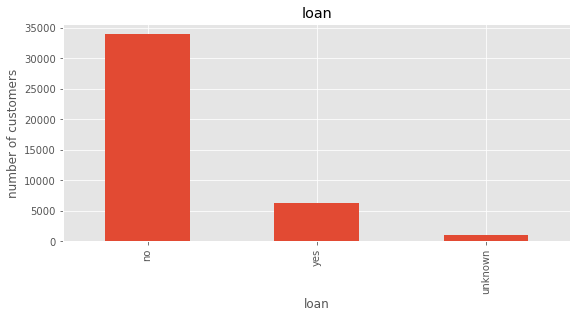

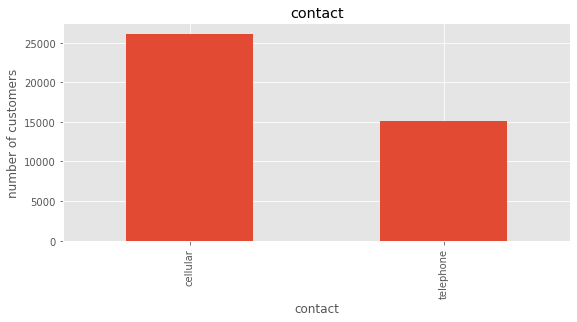

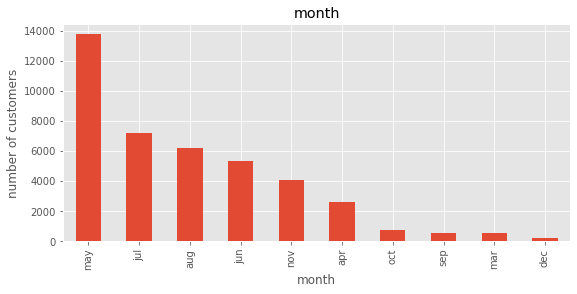

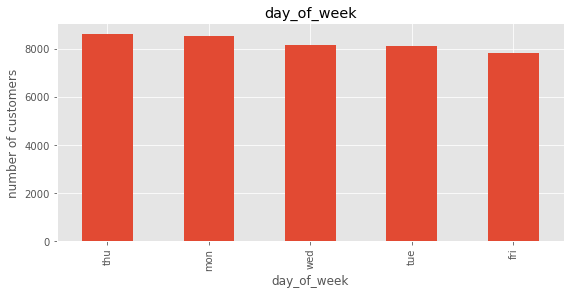

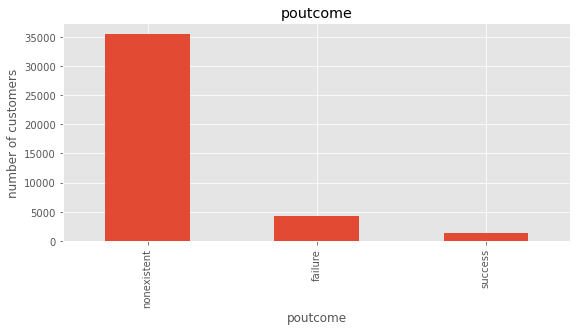

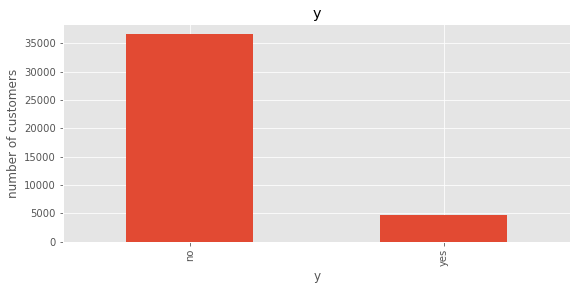

In [19]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

**From graph :**

From the first graph we can say that (job) we can say that our top three customers belongs to -  adminstrator, blue- collar, technician

Our huge number of customers are married

Majority has university degree

Many customers do not have any credit

Cellular phones are the most favoured method contacting the customers

Many customers have been contacted in the month of May.


# **Missing values**

In [20]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


missing values are repredented as unkown

In [22]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

# **Univariate analysis of Numerical columns**

In [23]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

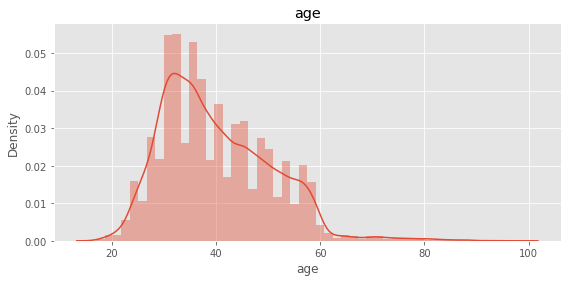

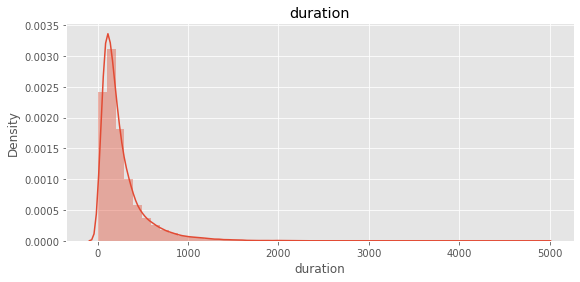

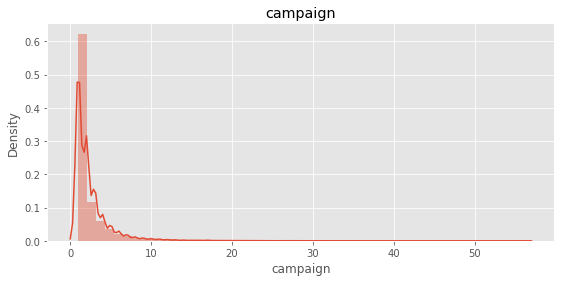

In [24]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

from the two graphs of duration and campaign we can see that the graphs postively skewed so there will be some outliers present in the data




Since pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [25]:
data.drop(columns=["pdays", "previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis=1, inplace=True)

# **Data Preprocessing**

# **checking outlier**

In [26]:
box = data[['age','duration','campaign']]

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

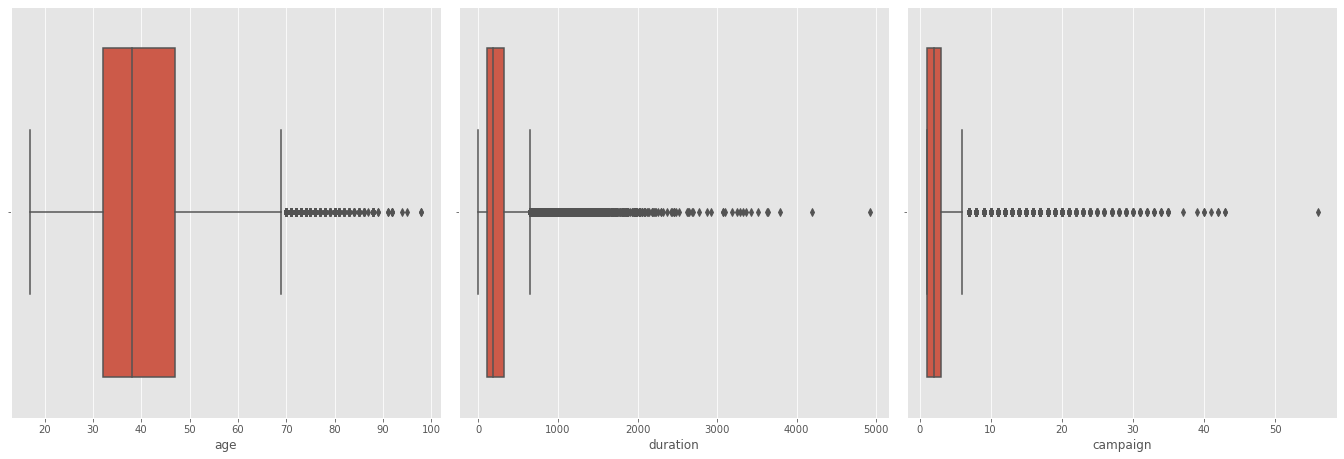

In [27]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<5):
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()    

# **Outer Handling**

# **age**

In [28]:
#outlier handling for age and its not a normal so we use IQR range
from scipy import stats


In [29]:
IQR = stats.iqr(data.age, interpolation = 'midpoint') #calculating Inter quantile range

IQR

15.0

In [30]:
Q1=data.age.quantile(0.25)#defining 25% of data
Q3=data.age.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [31]:
min_limit

9.5

In [32]:
max_limit

69.5

In [33]:
data.loc[data['age']<min_limit] #checking values which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [34]:
data.loc[data['age']>max_limit]#checking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,nonexistent,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,nonexistent,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,failure,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,nonexistent,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,no,yes,yes,cellular,oct,mon,138,4,success,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,failure,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,failure,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes


In [35]:
#imputing outlier with with median
data.loc[data['age']>max_limit,'age']=np.median(data.age)

In [36]:
data.loc[data['age']>max_limit] #checking whether outlier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


# **duration**

In [37]:
IQR = stats.iqr(data.duration, interpolation = 'midpoint') #calculating Inter quantile range

IQR

217.0

In [38]:
Q1=data.duration.quantile(0.25)#defining 25% of data
Q3=data.duration.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [39]:
min_limit

-223.5

In [40]:
max_limit

644.5

In [41]:
data.loc[data['duration']<min_limit] #checking values which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [42]:
data.loc[data['duration']>max_limit]#checking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,nonexistent,no
57,45,services,married,high.school,no,yes,no,telephone,may,mon,787,1,nonexistent,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,1,nonexistent,no
75,41,blue-collar,divorced,basic.4y,no,yes,no,telephone,may,mon,1575,1,nonexistent,yes
83,49,entrepreneur,married,university.degree,no,yes,no,telephone,may,mon,1042,1,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,712,2,success,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,success,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,843,1,nonexistent,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,success,yes


In [43]:
#imputing outlier with with median
data.loc[data['duration']>max_limit,'duration']=np.median(data.duration)

In [44]:
data.loc[data['duration']>max_limit] #checking whether outlier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


# **campaign**

In [45]:
IQR = stats.iqr(data.campaign, interpolation = 'midpoint') #calculating Inter quantile range

IQR

2.0

In [46]:
Q1=data.campaign.quantile(0.25)#defining 25% of data
Q3=data.campaign.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [47]:
min_limit

-2.0

In [48]:
max_limit

6.0

In [49]:
data.loc[data['campaign']<min_limit] #checking values which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [50]:
data.loc[data['campaign']<max_limit] #checking values which are less than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent,yes


In [51]:
#imputing outlier with with median
data.loc[data['campaign']>max_limit,'campaign']=np.median(data.campaign)

In [52]:
data.loc[data['campaign']>max_limit] #checking whether outlier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [53]:
# without outliers
data.describe()

,age,duration,campaign
count,41176.000000,41176.000000,41176.000000
mean,39.581212,201.596197,2.041748
std,9.621591,135.989810,1.242412
min,17.000000,0.000000,1.000000
25%,32.000000,102.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,265.000000,3.000000
max,69.000000,644.000000,6.000000


After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

# **Encoding Categorical Features**

In [54]:
#categorical features
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [55]:
# check categorical class
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding would create so many columns

In [56]:
# initializing label encoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [57]:
# label encoded dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,56,3,1,0,0,0,0,1,6,1,261,1,1,0
1,57,7,1,3,0,0,0,1,6,1,149,1,1,0
2,37,7,1,3,0,1,0,1,6,1,226,1,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,1,0
4,56,7,1,3,0,0,1,1,6,1,307,1,1,0


# **Separating independent and dependent variables**

In [58]:
# feature variables
X= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

# **Handling imbalanced dataset**
Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [59]:
!pip install imblearn

In [60]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 36537, 1: 4639})
Counter({0: 36537, 1: 36537})


# **Feature Selection**

<AxesSubplot:>

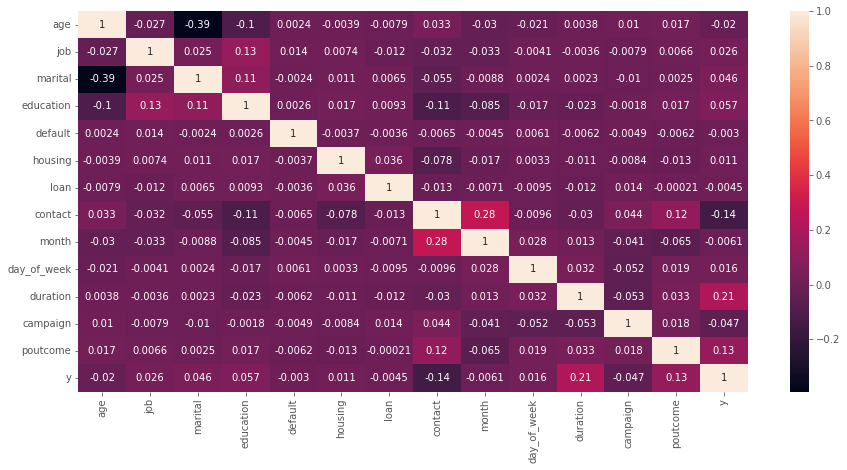

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

# **Model Creation**

In [62]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()           ## object creation
X_scaled = scalar.fit_transform(X)  # scaling independent variables #we can use minmax scalar,then we will get norminal distribuon data here we are getting standardized data.
#scaling is done by c score by means od finding the difference from mean
#in standaradized data mean will be always one and standard deviation will be zero.


In [63]:
X_scaled

array([[ 1.70647313, -0.17918749, -0.27976366, ...,  0.4368307 ,
        -0.83849812,  0.19265118],
       [ 1.8104073 ,  0.94773207, -0.27976366, ..., -0.38677042,
        -0.83849812,  0.19265118],
       [-0.26827617,  0.94773207, -0.27976366, ...,  0.17945535,
        -0.83849812,  0.19265118],
       ...,
       [ 1.70647313,  0.38427229, -0.27976366, ..., -0.09262716,
        -0.03360248,  0.19265118],
       [ 0.45926304,  1.51119185, -0.27976366, ...,  1.76782894,
        -0.83849812,  0.19265118],
       [-0.164342  ,  0.38427229, -0.27976366, ...,  0.27505191,
         0.77129317, -2.56268226]])

In [64]:
## preparing training and testing data
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# **Using DecisionTreeClassifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 1, 1, ..., 0, 0, 1])

In [66]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.8307636164583524

In [67]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     27334
           1       0.80      0.87      0.84     27471

    accuracy                           0.83     54805
   macro avg       0.83      0.83      0.83     54805
weighted avg       0.83      0.83      0.83     54805



In [68]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
y,,
0,21510,5824
1,3451,24020


In [69]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.8381749978190701

In [70]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.8193661393617604

In [71]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.8247105067459896

In [72]:
print(classification_report(y_test,y_hat))# for  testing

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      9203
           1       0.80      0.86      0.82      9066

    accuracy                           0.82     18269
   macro avg       0.82      0.82      0.82     18269
weighted avg       0.82      0.82      0.82     18269



In [73]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
y,,
0,7206,1997
1,1303,7763


# **Hyperparameters of DecisionTree**

In [74]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [75]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [76]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [77]:
tree_cv.best_score_#getting best score from cv

0.8698582714266951

In [78]:
dt.fit(X_train,y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [79]:
y_hat=dt.predict(X_test)#predicting
#y_hat1

In [80]:
acc_test=accuracy_score(y_test,y_hat)#checking accuracy
acc_test

0.7973616508840111

In [81]:
test_f1=f1_score(y_test,y_hat)#f1_score
test_f1

0.8111031737932441

In [82]:
print(classification_report(y_test,y_hat))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      9203
           1       0.75      0.88      0.81      9066

    accuracy                           0.80     18269
   macro avg       0.81      0.80      0.80     18269
weighted avg       0.81      0.80      0.80     18269



[Text(0.6171020591250854, 0.9545454545454546, 'X[7] <= 0.214\nentropy = 1.0\nsamples = 54805\nvalue = [27334, 27471]'),
 Text(0.4248227101845523, 0.8636363636363636, 'X[6] <= 0.912\nentropy = 0.967\nsamples = 42160\nvalue = [16618, 25542]'),
 Text(0.23944805194805194, 0.7727272727272727, 'X[5] <= 0.236\nentropy = 0.945\nsamples = 38660\nvalue = [14037, 24623]'),
 Text(0.11478981544771018, 0.6818181818181818, 'X[10] <= 377.979\nentropy = 0.856\nsamples = 21760\nvalue = [6097, 15663]'),
 Text(0.059125085440874914, 0.5909090909090909, 'X[11] <= 5.343\nentropy = 0.905\nsamples = 17093\nvalue = [5475, 11618]'),
 Text(0.03144224196855776, 0.5, 'X[9] <= 3.513\nentropy = 0.899\nsamples = 16917\nvalue = [5337, 11580]'),
 Text(0.010936431989063569, 0.4090909090909091, 'X[10] <= 41.821\nentropy = 0.869\nsamples = 14936\nvalue = [4332, 10604]'),
 Text(0.002734107997265892, 0.3181818181818182, 'X[10] <= 25.663\nentropy = 0.071\nsamples = 235\nvalue = [233, 2]'),
 Text(0.001367053998632946, 0.227272

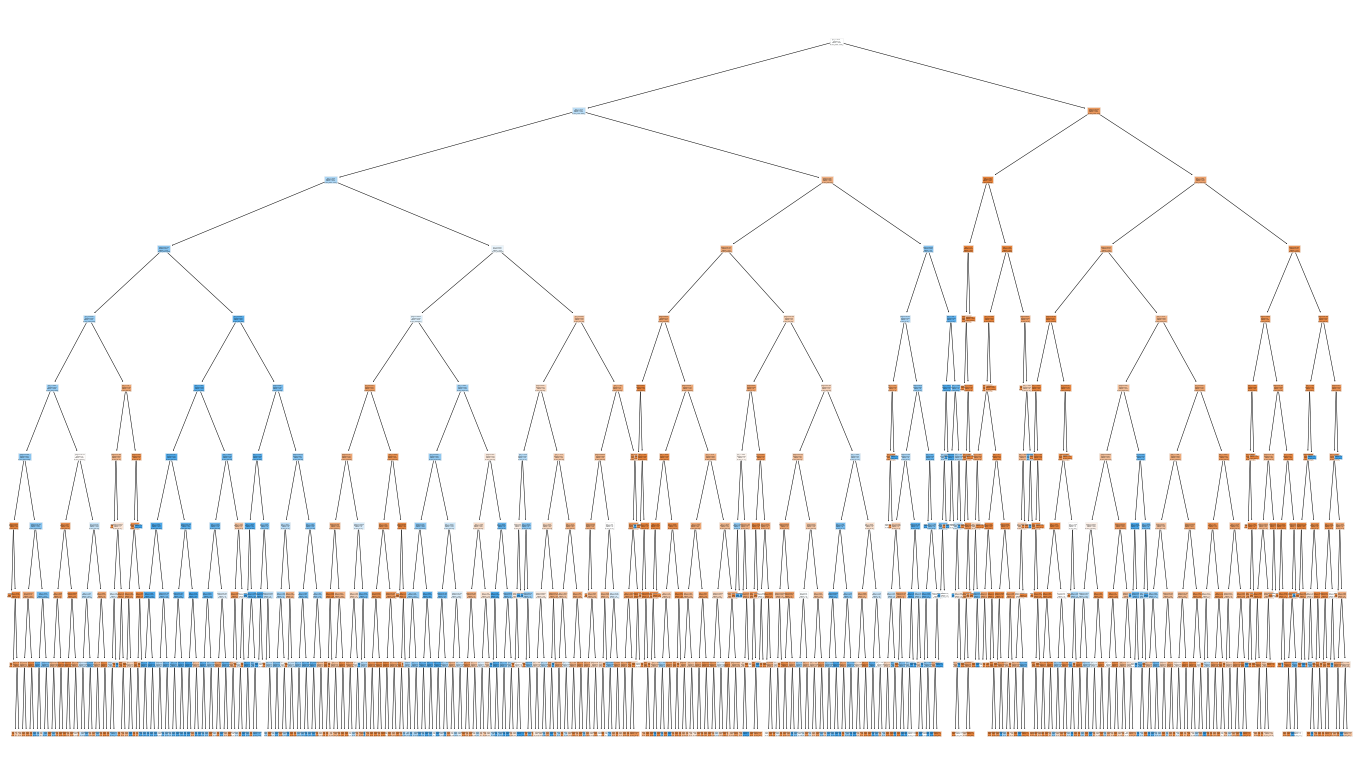

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

# **Using logistic regression**

In [84]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()      #object creation of logistic regression
    
log_reg.fit(X_train,y_train)        #training model with training data

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_train_pre=log_reg.predict(X_train)     # predicting y_train  

In [86]:
y_pred = log_reg.predict(X_test) # predicting y_test

In [87]:
y_train.shape # to know the shape of y_train (rows and columns)

(54805,)

In [88]:
y_pred.shape # to know the shape of y_pred (rows and columns )


(18269,)

In [89]:
# Evaluating the model

from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report, roc_curve, roc_auc_score

In [90]:
## calculating accuracy for training set
accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  ... true positive, true negative
accuracy

0.7381625764072621

In [91]:
accuracy = accuracy_score(y_test,y_pred)# model traning accuracy  
accuracy

0.7378619519404456

In [92]:
# Precison
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.7253662135103804

In [93]:
# Recall (recall varies from 0.0 to 1.0)
Recall = recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.7592102360467682

In [94]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)# when precision and recall both are important ,average of recall and precision.
F1_Score

0.7419024521692267

In [95]:
##confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
y,,
0,6597,2606
1,2183,6883


In [96]:
confusion_matrix(y_test, y_pred)

array([[6597, 2606],
       [2183, 6883]], dtype=int64)

In [97]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      9203
           1       0.73      0.76      0.74      9066

    accuracy                           0.74     18269
   macro avg       0.74      0.74      0.74     18269
weighted avg       0.74      0.74      0.74     18269



In [98]:
# Area Under Curve #this is to compare with algorithms
auc = roc_auc_score(y_test, y_pred)
auc

0.7380208520231667

# **Hyper Parameter 

In [99]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [100]:
from sklearn.model_selection import StratifiedKFold

In [101]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(X_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\l

best score is: 0.7426844312923819
best parameters are: {'C': 0.1, 'penalty': 'l2'}


C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[6514 2689]
 [1914 7152]]
0.748043133176419
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      9203
           1       0.73      0.79      0.76      9066

    accuracy                           0.75     18269
   macro avg       0.75      0.75      0.75     18269
weighted avg       0.75      0.75      0.75     18269



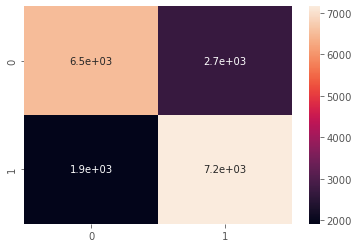

In [102]:
# checking model performance
y_predicted= gridsearch_log.predict(X_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

# **Using RandomForestClassifier and Hyperparameter tuning**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [104]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(X_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9039118390630587
best parameters are: {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'criterion': 'entropy'}


[[8109 1094]
 [ 563 8503]]
0.909299906946193
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9203
           1       0.89      0.94      0.91      9066

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



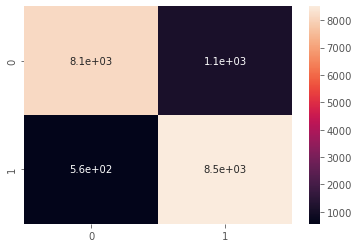

In [105]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

# **CONCLUSION**

Based on our data analysis, we decided to drop default, pdays, previous, day_of_week, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed.

Based on correlation between numerical values on social & economic attributes, we found that there are few strong correlation between each variable.

We tried 3 difference models as our first step in modelling process, to evaluate & choose the best model as our baseline model.

Our model focused on recall or where we will minimize false negative class - where we predicted clients that will not open a term deposit, turns out they actually want to open a term deposit.

The datset was a imbalance dataset. so we balanced the dataset

Based on the result, we found out that RandomForest Classifer with highest Recall 0.90 or 90%

We are able to minimize False Negative rate by maximizing our evaluation metric which is Recall by 90%.